In [132]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.patches as mpatches

import plotly.graph_objects as go
import plotly.express as px
import plotly.offline as py
import plotly.figure_factory as ff
import plotly.io as pio

In [180]:
df = pd.read_csv(r'C:\Users\Justin\Desktop\Data\Covid Ohio\COVIDSummaryData Ohio 8_12_20 Full.csv')

In [181]:
df['Month'] = df['OnsetDate'].str[0] #create a month column via the 'Onset Date' information

In [20]:
df.describe() #curious look at topline counts, not much is of interest due to the way the data is structured currently

Cases        Deaths  Hospitalized
count  49840.000000  49840.000000  49840.000000
mean       2.063122      0.074398      0.235955
std        5.067306      0.265914      0.438088
min        1.000000      0.000000      0.000000
25%        1.000000      0.000000      0.000000
50%        1.000000      0.000000      0.000000
75%        2.000000      0.000000      0.000000
max      408.000000      5.000000      4.000000

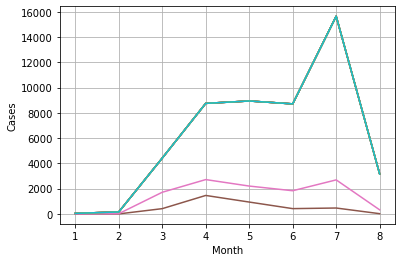

In [21]:
cases = [cases for cases, df in df.groupby('Month')]

plt.plot(cases, df.groupby(['Month']).count())
plt.xticks(cases)
plt.xlabel('Month')
plt.ylabel('Cases')
plt.grid()
plt.show()

#Basic graph, just letting the data stretch it's legs. Will add legend later

In [7]:
df #cleaning up the data, identify any NaN

FIPS   County     Sex AgeRange  OnsetDate  Cases  Deaths  \
0      39001    Adams  Female     0-19  4/28/2020    1.0     0.0   
1      39001    Adams  Female     0-19  6/10/2020    1.0     0.0   
2      39001    Adams  Female     0-19  6/19/2020    1.0     0.0   
3      39001    Adams  Female     0-19  6/30/2020    1.0     0.0   
4      39001    Adams  Female     0-19  7/18/2020    1.0     0.0   
...      ...      ...     ...      ...        ...    ...     ...   
49835  39175  Wyandot    Male      80+  3/28/2020    1.0     1.0   
49836  39175  Wyandot    Male      80+  5/25/2020    1.0     0.0   
49837  39175  Wyandot    Male      80+  5/25/2020    1.0     1.0   
49838  39175  Wyandot    Male      80+  7/22/2020    2.0     0.0   
49839  39175  Wyandot    Male      80+  7/23/2020    1.0     1.0   

       Hospitalized Month  
0               0.0     4  
1               0.0     6  
2               0.0     6  
3               0.0     6  
4               0.0     7  
...             ...   ...  
49835           1.0     3  
49836           0.0     5  
49837           1.0     5  
49838           0.0     7  
49839           0.0     7  

[49840 rows x 9 columns]

In [182]:
#remove NaN from data set

nan_df = df[df.isna().any(axis=1)]
display(nan_df.head())

df = df.dropna(how='all')
df.head() 

FIPS County     Sex AgeRange  OnsetDate Date Of Death Admission Date  \
0  39001  Adams  Female     0-19  4/28/2020           NaN            NaN   
1  39001  Adams  Female     0-19  6/10/2020           NaN            NaN   
2  39001  Adams  Female     0-19  6/19/2020           NaN            NaN   
3  39001  Adams  Female     0-19  6/30/2020           NaN            NaN   
4  39001  Adams  Female     0-19  7/18/2020           NaN            NaN   

   Cases  Deaths  Hospitalized Month  
0      1       0             0     4  
1      1       0             0     6  
2      1       0             0     6  
3      1       0             0     6  
4      1       0             0     7

FIPS County     Sex AgeRange  OnsetDate Date Of Death Admission Date  \
0  39001  Adams  Female     0-19  4/28/2020           NaN            NaN   
1  39001  Adams  Female     0-19  6/10/2020           NaN            NaN   
2  39001  Adams  Female     0-19  6/19/2020           NaN            NaN   
3  39001  Adams  Female     0-19  6/30/2020           NaN            NaN   
4  39001  Adams  Female     0-19  7/18/2020           NaN            NaN   

   Cases  Deaths  Hospitalized Month  
0      1       0             0     4  
1      1       0             0     6  
2      1       0             0     6  
3      1       0             0     6  
4      1       0             0     7

In [183]:
df['Cases'] = pd.to_numeric(df['Cases']) 
df['Deaths'] = pd.to_numeric(df['Deaths'])
df['Hospitalized'] = pd.to_numeric(df['Hospitalized'])
df['Month'] = pd.to_numeric(df['Month'])

#Columns to Correct Type

In [25]:
df.groupby(['Month']).sum()

Cases  Deaths  Hospitalized
Month                               
1         43.0     0.0           2.0
2        158.0     1.0          18.0
3       5709.0   416.0        1740.0
4      16886.0  1480.0        2769.0
5      15785.0   944.0        2254.0
6      19661.0   415.0        1865.0
7      38360.0   440.0        2787.0
8       6224.0    12.0         325.0

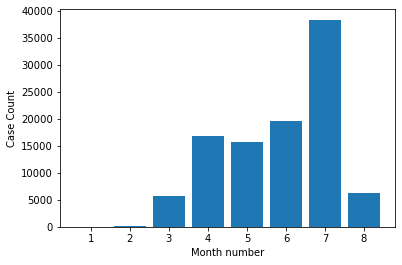

In [26]:
months = range(1,9)

fig1 = plt.gcf()

plt.bar(months,df.groupby(['Month']).sum()['Cases'])
plt.xticks(months)
plt.ylabel('Case Count')
plt.xlabel('Month number')
plt.show()
fig1.savefig('Covid Case Count by Month.png', dpi=300, bbox_inches='tight', transparent=False)

#basic covid cases by month graph

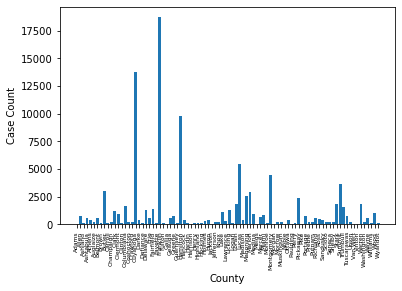

In [27]:
keys = [county for county, df in df.groupby(['County'])]

fig2 = plt.gcf()

plt.bar(keys,df.groupby(['County']).sum()['Cases'])
plt.ylabel('Case Count')
plt.xlabel('County')
plt.xticks(keys, rotation='vertical', size=6)
plt.show()
fig2.savefig('Covid Case Count by County.png', dpi=300, bbox_inches='tight', transparent=False)
#Case counts by county because why not. Save to .png to see what it looks like

In [99]:
df.groupby('County').sum()

Cases  Deaths  Hospitalized
County                                  
Adams         61.0     2.0           4.0
Allen        769.0    46.0         125.0
Ashland      154.0     3.0          21.0
Ashtabula    576.0    46.0          93.0
Athens       360.0     2.0          21.0
...            ...     ...           ...
Washington   209.0    22.0          17.0
Wayne        545.0    58.0          68.0
Williams     136.0     3.0           9.0
Wood        1068.0    58.0         105.0
Wyandot      150.0     9.0          12.0

[88 rows x 3 columns]

In [4]:
df.drop(df.columns[[5,6]], axis=1, inplace=True)

In [5]:
df

FIPS   County     Sex AgeRange  OnsetDate  Cases  Deaths  \
0      39001    Adams  Female     0-19  4/28/2020    1.0     0.0   
1      39001    Adams  Female     0-19  6/10/2020    1.0     0.0   
2      39001    Adams  Female     0-19  6/19/2020    1.0     0.0   
3      39001    Adams  Female     0-19  6/30/2020    1.0     0.0   
4      39001    Adams  Female     0-19  7/18/2020    1.0     0.0   
...      ...      ...     ...      ...        ...    ...     ...   
49836  39175  Wyandot    Male      80+  5/25/2020    1.0     0.0   
49837  39175  Wyandot    Male      80+  5/25/2020    1.0     1.0   
49838  39175  Wyandot    Male      80+  7/22/2020    2.0     0.0   
49839  39175  Wyandot    Male      80+  7/23/2020    1.0     1.0   
49840    NaN      NaN     NaN      NaN        NaN    NaN     NaN   

       Hospitalized Month  
0               0.0     4  
1               0.0     6  
2               0.0     6  
3               0.0     6  
4               0.0     7  
...             ...   ...  
49836           0.0     5  
49837           1.0     5  
49838           0.0     7  
49839           0.0     7  
49840           NaN   NaN  

[49841 rows x 9 columns]

In [32]:
df.groupby('Month').sum()

Cases  Deaths  Hospitalized
Month                               
1         43.0     0.0           2.0
2        158.0     1.0          18.0
3       5709.0   416.0        1740.0
4      16886.0  1480.0        2769.0
5      15785.0   944.0        2254.0
6      19661.0   415.0        1865.0
7      38360.0   440.0        2787.0
8       6224.0    12.0         325.0

In [73]:
df2 = df.groupby('Month').sum()

In [74]:
df2

Cases  Deaths  Hospitalized
Month                               
1         43.0     0.0           2.0
2        158.0     1.0          18.0
3       5709.0   416.0        1740.0
4      16886.0  1480.0        2769.0
5      15785.0   944.0        2254.0
6      19661.0   415.0        1865.0
7      38360.0   440.0        2787.0
8       6224.0    12.0         325.0

In [75]:
df2.describe()

Cases       Deaths  Hospitalized
count      8.000000     8.000000      8.000000
mean   12853.250000   463.500000   1470.000000
std    12773.058295   521.249049   1185.617621
min       43.000000     0.000000      2.000000
25%     4321.250000     9.250000    248.250000
50%    11004.500000   415.500000   1802.500000
75%    17579.750000   566.000000   2382.750000
max    38360.000000  1480.000000   2787.000000

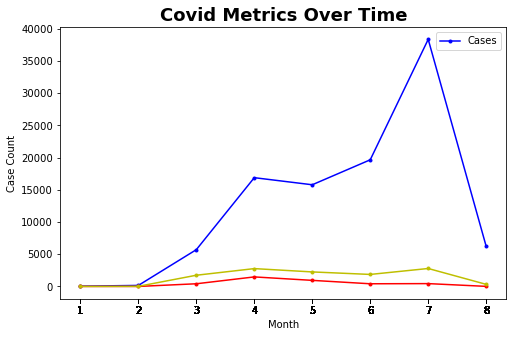

In [42]:
metrics_over_time = pd.read_csv(r'C:\Users\Justin\df2.csv')

plt.figure(figsize=(8,5))

plt.title('Covid Metrics Over Time', fontdict={'fontweight':'bold', 'fontsize': 18})

plt.plot(metrics_over_time.Month, metrics_over_time.Cases, 'b.-', label='Cases')
plt.plot(metrics_over_time.Month, metrics_over_time.Deaths, 'r.-')
plt.plot(metrics_over_time.Month, metrics_over_time.Hospitalized, 'y.-')

# Another Way to plot many values!
# countries_to_look_at = ['Australia', 'USA', 'Canada', 'South Korea']
# for country in gas:
#     if country in countries_to_look_at:
#         plt.plot(gas.Year, gas[country], marker='.')

plt.xticks(df.Month[::1].tolist()+[8])

plt.xlabel('Month')
plt.ylabel('Case Count')

plt.legend()

plt.show()

fig3.savefig('Covid Metrics Over Time.png', dpi=300, bbox_inches='tight', transparent=False)

In [40]:
metrics_over_time = pd.read_csv(r'C:\Users\Justin\df2.csv')

In [41]:
metrics_over_time

Month    Cases  Deaths  Hospitalized
0      1     43.0     0.0           2.0
1      2    158.0     1.0          18.0
2      3   5709.0   416.0        1740.0
3      4  16886.0  1480.0        2769.0
4      5  15785.0   944.0        2254.0
5      6  19661.0   415.0        1865.0
6      7  38360.0   440.0        2787.0
7      8   6224.0    12.0         325.0

In [76]:
metrics_over_time.describe()

Month         Cases       Deaths  Hospitalized
count  8.00000      8.000000     8.000000      8.000000
mean   4.50000  12853.250000   463.500000   1470.000000
std    2.44949  12773.058295   521.249049   1185.617621
min    1.00000     43.000000     0.000000      2.000000
25%    2.75000   4321.250000     9.250000    248.250000
50%    4.50000  11004.500000   415.500000   1802.500000
75%    6.25000  17579.750000   566.000000   2382.750000
max    8.00000  38360.000000  1480.000000   2787.000000

In [42]:
#Subtract August due to incomplate data to demonstrate upward climb in cases

metrics_over_time2 = metrics_over_time.loc[df['Month'].str.contains('2|3|4|5|6|7', flags=re.I, regex=True)]

In [43]:
metrics_over_time2.to_csv('Metrics_over_time2.csv')

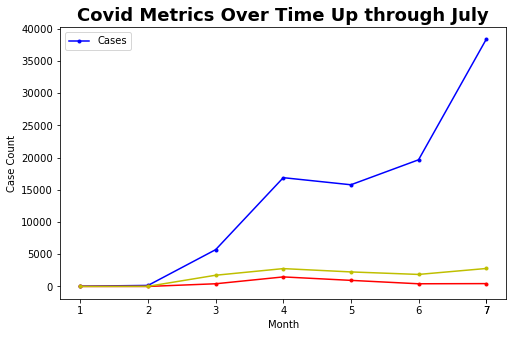

In [54]:
metrics_over_time2 = pd.read_csv(r'C:\Users\Justin\Metrics_over_time2.csv')

Jan_July = plt.figure(figsize=(8,5))

plt.title('Covid Metrics Over Time Up through July', fontdict={'fontweight':'bold', 'fontsize': 18})

plt.plot(metrics_over_time2.Month, metrics_over_time2.Cases, 'b.-', label='Cases')
plt.plot(metrics_over_time2.Month, metrics_over_time2.Deaths, 'r.-')
plt.plot(metrics_over_time2.Month, metrics_over_time2.Hospitalized, 'y.-')

plt.xticks(metrics_over_time2.Month[::1].tolist()+[7])

plt.xlabel('Month')
plt.ylabel('Case Count')

plt.legend()

plt.show()

Jan_July.savefig('Covid Metrics Over Time up through July.png', dpi=300, bbox_inches='tight', transparent=False)

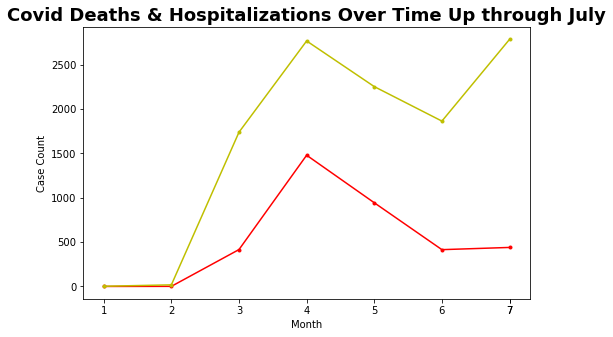

In [55]:
metrics_over_time2 = pd.read_csv(r'C:\Users\Justin\Metrics_over_time2.csv')

Deaths_Hospitalzed = plt.figure(figsize=(8,5))

plt.title('Covid Deaths & Hospitalizations Over Time Up through July', fontdict={'fontweight':'bold', 'fontsize': 18})

plt.plot(metrics_over_time2.Month, metrics_over_time2.Deaths, 'r.-')
plt.plot(metrics_over_time2.Month, metrics_over_time2.Hospitalized, 'y.-')

plt.xticks(metrics_over_time2.Month[::1].tolist()+[7])

plt.xlabel('Month')
plt.ylabel('Case Count')

plt.show()

In [ ]:
# descrptive summary - cases/deaths/hospitalized by gender, and by age group

# Q's - what age group is drving the cases overall? What age group is drove the origional spike, March/April/May
#What age group is driving the recent spike, June/July only

In [6]:
df.groupby(['Sex']).sum().sort_values('Cases', ascending=False)

Cases  Deaths  Hospitalized   Month
Sex                                           
Female   52928.0  1837.0        5684.0  143857
Male     49048.0  1871.0        6051.0  132440
Unknown    850.0     0.0          25.0    4181

In [77]:
Gender = df.groupby(['Sex']).sum().sort_values('Cases', ascending=False)
# groupby aggregating statistics

In [79]:
Gender

Cases  Deaths  Hospitalized
Sex                                   
Female   52928.0  1837.0        5684.0
Male     49048.0  1871.0        6051.0
Unknown    850.0     0.0          25.0

In [80]:
Gender.describe()

Cases       Deaths  Hospitalized
count      3.000000     3.000000       3.00000
mean   34275.333333  1236.000000    3920.00000
std    29012.123006  1070.542386    3378.15645
min      850.000000     0.000000      25.00000
25%    24949.000000   918.500000    2854.50000
50%    49048.000000  1837.000000    5684.00000
75%    50988.000000  1854.000000    5867.50000
max    52928.000000  1871.000000    6051.00000

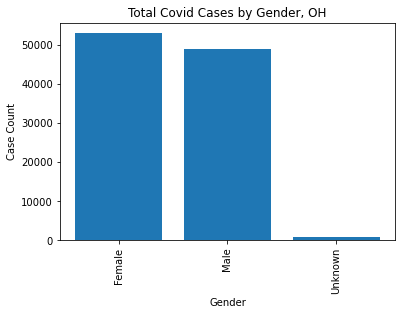

In [18]:
keys = [sex for sex, Gender in Gender.groupby(['Sex'])]

figGender = plt.gcf()
plt.bar(keys,Gender.groupby(['Sex']).sum()['Cases'])
plt.ylabel('Case Count')
plt.xlabel('Gender')
plt.title('Total Covid Cases by Gender, OH')
plt.xticks(keys, rotation='vertical', size=10)
    
plt.show()

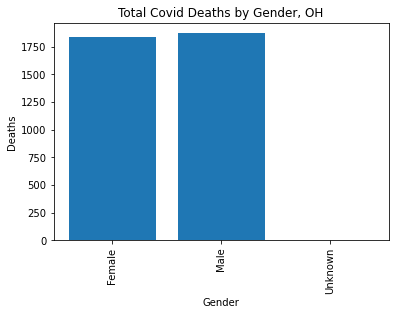

In [60]:
keys1 = [sex for sex, Gender in Gender.groupby(['Sex'])]

figGender = plt.gcf()
plt.bar(keys1,Gender.groupby(['Sex']).sum()['Deaths'])
plt.ylabel('Deaths')
plt.xlabel('Gender')
plt.title('Total Covid Deaths by Gender, OH')
plt.xticks(keys1, rotation='vertical', size=10)
    
plt.show()

In [15]:
Gender.to_csv('GenderOHCovid.csv')

In [62]:
GenderOH = pd.read_csv(r'C:\Users\Justin\GenderOHCovid.csv')

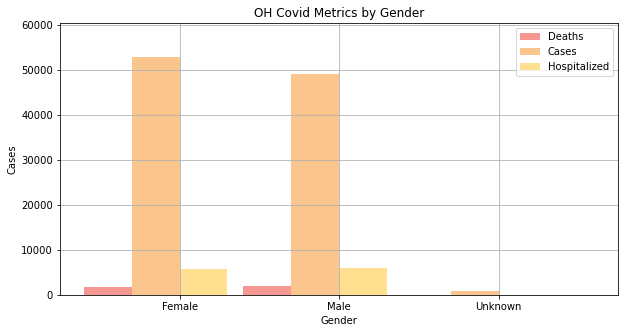

In [11]:
# Graph - Covid metrics by Gender (total)

# Setting the positions and width for the bars
pos = list(range(len(GenderOH['Deaths'])))
width = 0.3

# Plotting the bars
fig4, ax = plt.subplots(figsize=(10,5))

# Create a bar with pre_score data
plt.bar(pos, GenderOH['Deaths'], width, alpha=0.5, color='#EE3224')
#plt.show()

 # Create a bar with mid_score data,
plt.bar([p + width for p in pos], GenderOH['Cases'], width, alpha=0.5, color='#F78F1E')
#plt.show()

# Create a bar with post_score data,
plt.bar([p + width*2 for p in pos], GenderOH['Hospitalized'], width, alpha=0.5, color='#FFC222')
#plt.show()

# Set the y axis label
ax.set_ylabel('Cases')
ax.set_xlabel('Gender')

# Set the chart's title
ax.set_title('OH Covid Metrics by Gender')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(GenderOH['Sex'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(GenderOH['Deaths'] + GenderOH['Cases'] + GenderOH['Hospitalized'])] )

# Adding the legend and showing the plot
plt.legend(['Deaths', 'Cases', 'Hospitalized'], loc='upper right')
plt.grid()
plt.show()
fig4.savefig('Covid Metrics by Gender OH.png', dpi=300, bbox_inches='tight', transparent=False)

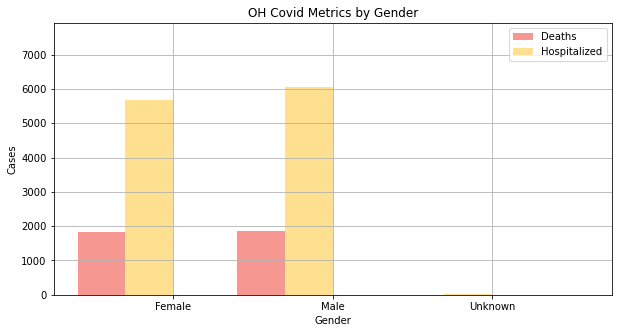

In [66]:
pos = list(range(len(GenderOH['Deaths'])))
width = 0.3

figDH, ax = plt.subplots(figsize=(10,5))

plt.bar(pos, GenderOH['Deaths'], width, alpha=0.5, color='#EE3224')

plt.bar([p + width*1 for p in pos], GenderOH['Hospitalized'], width, alpha=0.5, color='#FFC222')

ax.set_ylabel('Cases')
ax.set_xlabel('Gender')

ax.set_title('OH Covid Metrics by Gender')

ax.set_xticks([p + 1.5 * width for p in pos])

ax.set_xticklabels(GenderOH['Sex'])

plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(GenderOH['Deaths'] + GenderOH['Hospitalized'])] )

plt.legend(['Deaths', 'Hospitalized'], loc='upper right')
plt.grid()
plt.show()

In [150]:
import re

In [16]:
# Age ranges -total

Age = df.groupby(['AgeRange']).sum().sort_values('Cases', ascending=False)

In [17]:
Age

Cases  Deaths  Hospitalized  Month
AgeRange                                      
20-29     20927.0    14.0         583.0  39702
30-39     16995.0    30.0         820.0  36972
50-59     15218.0   232.0        2075.0  43555
40-49     14923.0    65.0        1142.0  37965
60-69     11359.0   521.0        2501.0  39208
0-19       9360.0     2.0         229.0  25168
70-79      7089.0   909.0        2272.0  30002
80+        6866.0  1935.0        2133.0  27381
Unknown      89.0     0.0           5.0    525

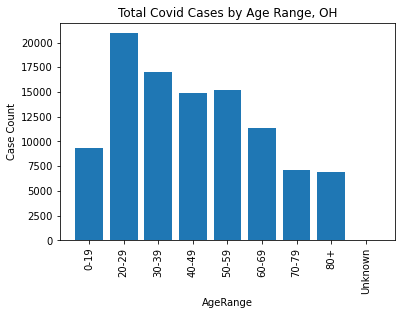

In [117]:
keys = [age for age, Age in Age.groupby(['AgeRange'])]

figAge = plt.gcf()
plt.bar(keys,Age.groupby(['AgeRange']).sum()['Cases'])
plt.ylabel('Case Count')
plt.xlabel('AgeRange')
plt.title('Total Covid Cases by Age Range, OH')
plt.xticks(keys, rotation='vertical', size=10)

plt.show()
#total by gender
#overall, younger demo pushing the covid caseload higher in total - next: breakdown by each spike

In [81]:
# What age range was driving the initial surge of Covid cases in the months of 3,4,5

dfage345 = df.loc[df['Month'].str.contains('3|4|5', flags=re.I, regex=True)].sort_values('AgeRange')

In [82]:
dfage345

FIPS     County      Sex AgeRange  OnsetDate  Cases  Deaths  \
0      39001      Adams   Female     0-19  4/28/2020    1.0     0.0   
31826  39099   Mahoning     Male     0-19  4/15/2020    1.0     0.0   
31827  39099   Mahoning     Male     0-19  4/17/2020    1.0     0.0   
31828  39099   Mahoning     Male     0-19  4/18/2020    1.0     0.0   
31829  39099   Mahoning     Male     0-19   5/1/2020    1.0     0.0   
...      ...        ...      ...      ...        ...    ...     ...   
9224   39035   Cuyahoga   Female  Unknown  3/23/2020    1.0     0.0   
11429  39035   Cuyahoga  Unknown  Unknown  4/16/2020    1.0     0.0   
11372  39035   Cuyahoga     Male  Unknown  3/27/2020    1.0     0.0   
1048   39007  Ashtabula   Female  Unknown  5/15/2020    1.0     0.0   
30502  39095      Lucas     Male  Unknown  4/14/2020    1.0     0.0   

       Hospitalized Month  
0               0.0     4  
31826           0.0     4  
31827           0.0     4  
31828           0.0     4  
31829           0.0     5  
...             ...   ...  
9224            0.0     3  
11429           0.0     4  
11372           0.0     3  
1048            0.0     5  
30502           0.0     4  

[22113 rows x 9 columns]

In [35]:
dfage345['Count'] = 1

In [36]:
dfage345.groupby(['AgeRange']).count()['Count']

#skews older - 40-80+ age range

AgeRange
0-19       1130
20-29      2444
30-39      2710
40-49      3011
50-59      3645
60-69      3468
70-79      2689
80+        3000
Unknown      16
Name: Count, dtype: int64

In [84]:
# What age range was driving the initial surge of Covid cases in the month of July (7)

dfage67 = df.loc[df['Month'].str.contains('6|7', flags=re.I, regex=True)].sort_values('AgeRange')

In [38]:
dfage67['Count'] = 1

In [39]:
dfage67.groupby(['AgeRange']).count()['Count']

# More evenly spread than i would have thought. 20-29 & 50-59 similar in # of cases. Massive case increase in younger age ranges

AgeRange
0-19       2584
20-29      3865
30-39      3307
40-49      3258
50-59      3716
60-69      3249
70-79      2442
80+        1884
Unknown      57
Name: Count, dtype: int64

In [22]:
County = df.groupby('County').sum()

In [23]:
County

Cases  Deaths  Hospitalized  Month
County                                         
Adams         61.0     2.0           4.0    393
Allen        769.0    46.0         125.0   3568
Ashland      154.0     3.0          21.0    920
Ashtabula    576.0    46.0          93.0   2524
Athens       360.0     2.0          21.0   1131
...            ...     ...           ...    ...
Washington   209.0    22.0          17.0    991
Wayne        545.0    58.0          68.0   2679
Williams     136.0     3.0           9.0    741
Wood        1068.0    58.0         105.0   4262
Wyandot      150.0     9.0          12.0    798

[88 rows x 4 columns]

In [24]:
County.to_csv('CountyCovidOH.csv')

In [25]:
County = pd.read_csv(r'C:\Users\Justin\CountyCovidOH.csv')

In [30]:
County = pd.DataFrame(County, dtype=object)

In [42]:
County.astype(np.int64)

Cases  Deaths  Hospitalized  Death Rate
County                                             
Franklin    18697     529          1608           0
Cuyahoga    13734     505          2221           0
Hamilton     9766     257           986           0
Lucas        5448     326           777           0
Montgomery   4438      96           624           0
...           ...     ...           ...         ...
Meigs          54       0             5           0
Vinton         32       2             7           0
Morgan         30       0             0           0
Harrison       26       1             5           0
Noble          16       0             2           0

[88 rows x 4 columns]

In [90]:
County.fillna(0.0).astype(int)

Cases  Deaths  Hospitalized  Death Rate
County                                           
Franklin  18697     529          1608           0
All       18697     529          2221           0
Cuyahoga  13734     505          2221           0
Hamilton   9766     257           986           0
Lucas      5448     326           777           0
...         ...     ...           ...         ...
Meigs        54       0             5           0
Vinton       32       2             7           0
Morgan       30       0             0           0
Harrison     26       1             5           0
Noble        16       0             2           0

[89 rows x 4 columns]

In [130]:
County2 = pd.pivot_table(County, values=['Cases','Deaths','Hospitalized'], index='County', aggfunc='max')
County['Death Rate'] = round(County['Deaths'] /County['Cases'], 2)
County2 = County.sort_values(by='Cases', ascending= False)
County2.style\
    .background_gradient(cmap='Blues')\
    .set_precision(2)

In [186]:
County2.to_excel('CountyPivot.xlsx')

In [145]:
fig = px.line(df, x="OnsetDate", y="Cases", color='County', height=600,
             title='Cases', color_discrete_sequence = px.colors.cyclical.mygbm)
fig.show()


fig = px.line(df, x="OnsetDate", y="Deaths", color='County', height=600,
             title='Deaths', color_discrete_sequence = px.colors.cyclical.mygbm)
fig.show()


fig = px.line(df, x="OnsetDate", y="Hospitalized", color='County', height=600,
             title='Hospitalized', color_discrete_sequence = px.colors.cyclical.mygbm)
fig.show()

In [152]:
franklin = df.loc[df['County'].str.contains('Franklin', flags=re.I, regex=True)]

In [162]:
franklin

FIPS    County     Sex AgeRange  OnsetDate Date Of Death  \
14938  39049  Franklin  Female    30-39   8/9/2020           NaN   
16527  39049  Franklin    Male     0-19   8/9/2020           NaN   
16717  39049  Franklin    Male    20-29   8/9/2020           NaN   
16030  39049  Franklin  Female    70-79   8/9/2020           NaN   
18103  39049  Franklin    Male    70-79   8/9/2020           NaN   
...      ...       ...     ...      ...        ...           ...   
16931  39049  Franklin    Male    40-49  2/18/2020           NaN   
15459  39049  Franklin  Female    60-69  2/15/2020           NaN   
14940  39049  Franklin  Female    40-49  2/14/2020           NaN   
14334  39049  Franklin  Female     0-19  1/30/2020           NaN   
15458  39049  Franklin  Female    60-69  1/15/2020           NaN   

      Admission Date  Cases  Deaths  Hospitalized  Month  Death Rate  
14938            NaN      7       0             0      8           0  
16527            NaN      6       0             0      8           0  
16717            NaN      6       0             0      8           0  
16030            NaN      3       0             0      8           0  
18103            NaN      2       0             0      8           0  
...              ...    ...     ...           ...    ...         ...  
16931            NaN      1       0             0      2           0  
15459            NaN      1       0             0      2           0  
14940            NaN      1       0             0      2           0  
14334            NaN      1       0             0      1           0  
15458            NaN      1       0             0      1           0  

[4211 rows x 12 columns]

In [154]:
fig = px.line(franklin, x="OnsetDate", y="Cases", color='County', height=600,
             title='Cases', color_discrete_sequence = px.colors.cyclical.mygbm)
fig.show()


fig = px.line(franklin, x="OnsetDate", y="Deaths", color='County', height=600,
             title='Deaths', color_discrete_sequence = px.colors.cyclical.mygbm)
fig.show()


fig = px.line(franklin, x="OnsetDate", y="Hospitalized", color='County', height=600,
             title='Hospitalized', color_discrete_sequence = px.colors.cyclical.mygbm)
fig.show()

In [157]:
franklindate = franklin.groupby('OnsetDate').sum()

In [171]:
franklindate.drop(['Month'], axis=1)

Cases  Deaths  Hospitalized  Death Rate
OnsetDate                                         
1/15/2020      1       0             0           0
1/30/2020      1       0             0           0
2/14/2020      1       0             0           0
2/15/2020      1       0             0           0
2/18/2020      1       0             0           0
...          ...     ...           ...         ...
8/5/2020     159       0             3           0
8/6/2020     108       0             1           0
8/7/2020     100       0             0           0
8/8/2020      41       0             0           0
8/9/2020      36       0             2           0

[174 rows x 4 columns]

In [173]:
franklindate = franklindate.drop(['Month'], axis=1)

In [174]:
franklindate1 = pd.pivot_table(franklindate, values=['Cases','Deaths','Hospitalized'], index='OnsetDate', aggfunc='max')
franklindate['Death Rate'] = round(franklindate['Deaths'] /franklindate['Cases'], 2)
franklindate1 = franklindate.sort_values(by='OnsetDate', ascending= False)
franklindate1.style\
    .background_gradient(cmap='Blues')\
    .set_precision(2)

In [185]:
franklindate1.to_excel('FranklinPivot.xlsx')